<a href="https://colab.research.google.com/github/zoya-ivanova/Parsing/blob/main/8_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    1. Датасет House Prices Kaggle со страницы конкурса<br>
    (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)
    2. Загрузите в pandas DataFrame под названием df.
    3. Выполните предварительную обработку данных, выполнив следующие шаги:
    a. Определите и обработайте отсутствующие значения в датасете.
    Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать
    (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с
    существенными отсутствующими значениями).
    b. Проверьте и обработайте любые дублирующиеся строки в датасете.
    c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их
    (например, из объектных в числовые типы).
    4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы:
    a. Каково распределение целевой переменной 'SalePrice'?
    Есть ли какие-либо выбросы?
    b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?
    c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual',
    'GrLivArea', 'GarageCars' и т.д.
    d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния,
    квадратные диаграммы), чтобы получить представление о датасете.
    5. Выполните проектирование признаков путем реализации следующих преобразований:
    a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding,
    в зависимости от характера переменной.
    b. При необходимости создайте новые характеристики, такие как общая площадь или возраст
    объекта недвижимости, путем объединения существующих характеристик.
    6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл
    под названием 'cleaned_house_prices.csv'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
#Подгружаем данные

df = pd.read_csv('train_data.csv')

# Выводим датафрейм
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# Посмотрим размеры: строки / столбцы
df.shape

(1460, 81)

In [ ]:
# Выведем названия всех столбцов
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Генерируем описательную статистику
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Выведем имеющуюся информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Посмотрим количество пропущенных значений для каждого столбца
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Text(0.5, 1.0, 'Общее количество недостающих значений  (%)')

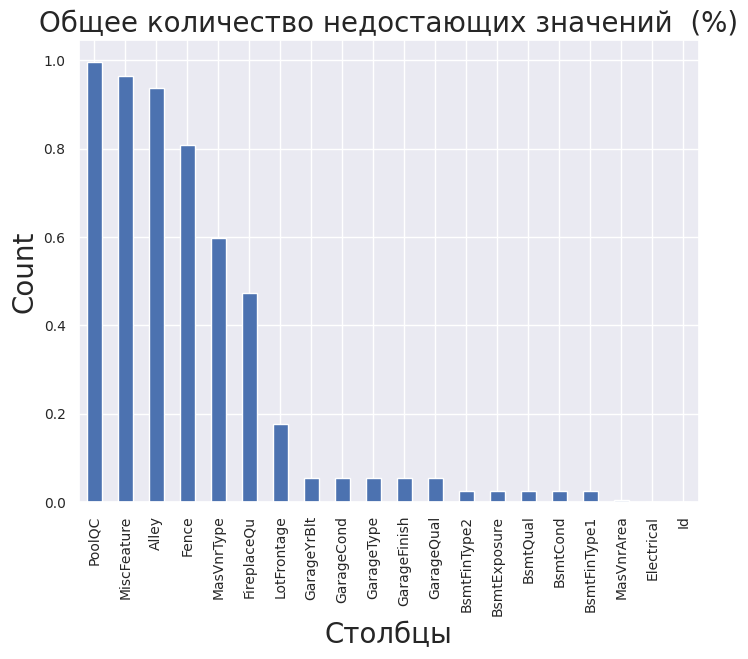

In [ ]:
# Визуализируем
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Гистограмма
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Столбцы", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Общее количество недостающих значений  (%)", fontsize = 20)

In [ ]:
# Неполностью заполненные столбцы:

# 3   LotFrontage    1201 non-null   float64 погонные футы улицы, соединенной с участком.
# 6   Alley          91 non-null     object  тип подъезда к дороге
# 25  MasVnrType     588 non-null    object  тип каменной облицовки.
# 26  MasVnrArea     1452 non-null   float64 площадь каменного шпона в квадратных футах.
# 30  BsmtQual       1423 non-null   object  высота подвала.
# 31  BsmtCond       1423 non-null   object  общее состояние подвала
# 32  BsmtExposure   1422 non-null   object  стены подвала на уровне сада или выходного этажа.
# 33  BsmtFinType1   1423 non-null   object  качество готовой площади подвала.
# 35  BsmtFinType2   1422 non-null   object  качество второй готовой площади (если имеется).
# 57  FireplaceQu    770 non-null    object  качество камина
# 58  GarageType     1379 non-null   object  расположение гаража
# 59  GarageYrBlt    1379 non-null   float64 год постройки гаража.
# 60  GarageFinish   1379 non-null   object  внутренняя отделка гаража.
# 63  GarageQual     1379 non-null   object  внутренняя отделка гаража.
# 64  GarageCond     1379 non-null   object  состояние гаража
# 72  PoolQC         7 non-null      object  качество бассейна
# 73  Fence          281 non-null    object  качество забора
# 74  MiscFeature    54 non-null     object  разные функции, не вошедшие в другие

In [ ]:
# Заполним пропущенные значения указанных столбцов (характеристики подвала и гаража) наиболее частыми значениями (модами)

columns_to_mode = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for column in columns_to_mode:
    mode_rating = df[column].mode()
    df[column] = df[column].fillna(mode_rating[0])

In [ ]:
# Пропущенные значения столбцов 'LotFrontage', 'MasVnrArea' заполненим средними значениями

columns_to_mean = ['LotFrontage', 'MasVnrArea']

for column in columns_to_mean:
    mean_rating = df[column].mean()
    print(mean_rating)
    df[column] = df[column].fillna(mean_rating)

70.04995836802665
103.68526170798899


In [ ]:
# Удалим неинформативные столбцы

columns_to_remove = ['Alley', 'MasVnrType', 'BsmtExposure', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

df = df.drop(columns=columns_to_remove)

In [ ]:
# Подсчет дубликатов в df
duplicates_by_columns = df.duplicated().sum()

# Вывод результата
print(f"Количество дубликатов: {duplicates_by_columns}")


Количество дубликатов: 0


In [ ]:
# Подсчет дубликатов с учетом указанных колонок
duplicates_by_columns = df.duplicated(['Id']).sum()

# Вывод результата
print(f"Количество дубликатов: {duplicates_by_columns}")


Количество дубликатов: 0


In [ ]:
# Проверим все значения в 'object' столбцах на тип данных
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Уникальные значения в столбце '{col}': {unique_values}")

Уникальные значения в столбце 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Уникальные значения в столбце 'Street': ['Pave' 'Grvl']
Уникальные значения в столбце 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Уникальные значения в столбце 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Уникальные значения в столбце 'Utilities': ['AllPub' 'NoSeWa']
Уникальные значения в столбце 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Уникальные значения в столбце 'LandSlope': ['Gtl' 'Mod' 'Sev']
Уникальные значения в столбце 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Уникальные значения в столбце 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Уникальные значения в столбце 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Уникальные 

! т.к. все значения объектных типов - строки, нет необходимости в преобразовании

In [ ]:
# Посмотрим на нашу целевую переменную SalePrice

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Стандартное отклонение слишком велико, большая разница между минимальным значением и 25-м процентилем, разница между 75-м процентилем и максимумом больше, чем 25-й процентиль и максимум, полагаем, что цена дома существенно отклоняется от нормального распределения.



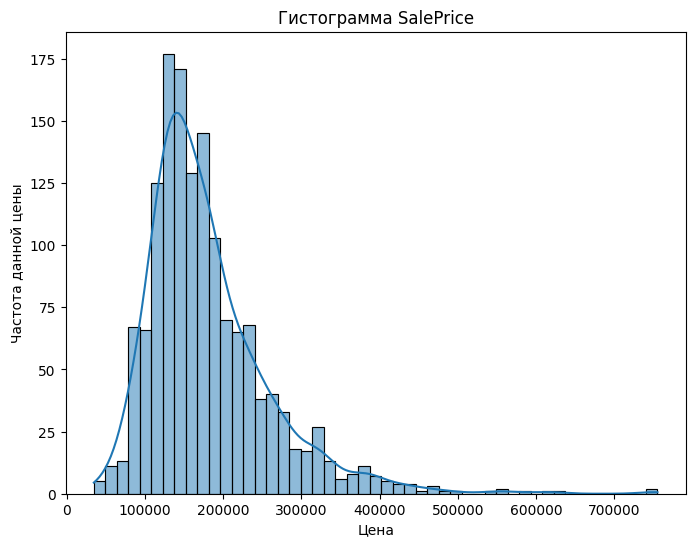

In [ ]:
# Построим гистограмму, чтобы отобразить распределение

plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Гистограмма SalePrice')
plt.xlabel('Цена')
plt.ylabel('Частота данной цены')
plt.show()

график подтверждает, что распределение не является нормальным

In [ ]:
# Рассчитываем асимметрию и эксцесс для более точной оценки
print("Ассиметрия: %f" % df['SalePrice'].skew())
print("Эксцесс: %f" % df['SalePrice'].kurt())

Ассиметрия: 1.882876
Эксцесс: 6.536282


Ассиметрия: 1.88, что говорит о смещении распределения.
Эксцесс равный 6.54, что также указывает на нестандартное распределение.

Применение логарифмического преобразования к целевой переменной позволит сделать распределение более близким к нормальному

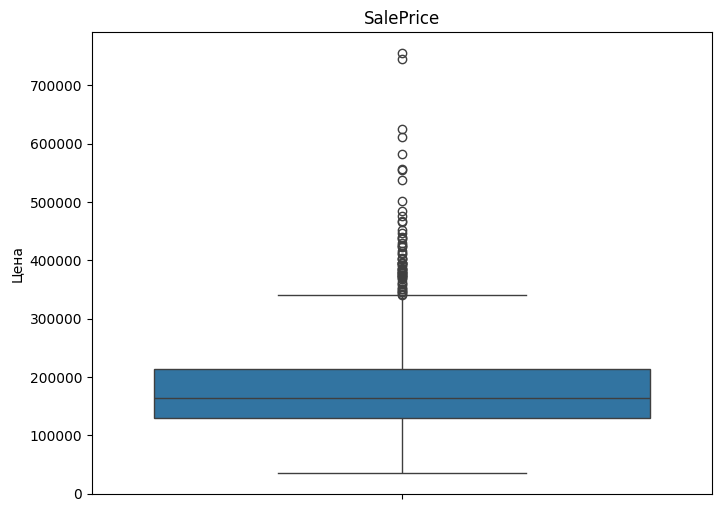

In [ ]:
# Посмотрим на выбросы при помощи графика "Ящик с усами"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='SalePrice')
plt.title('SalePrice')
plt.ylabel('Цена')
plt.show()

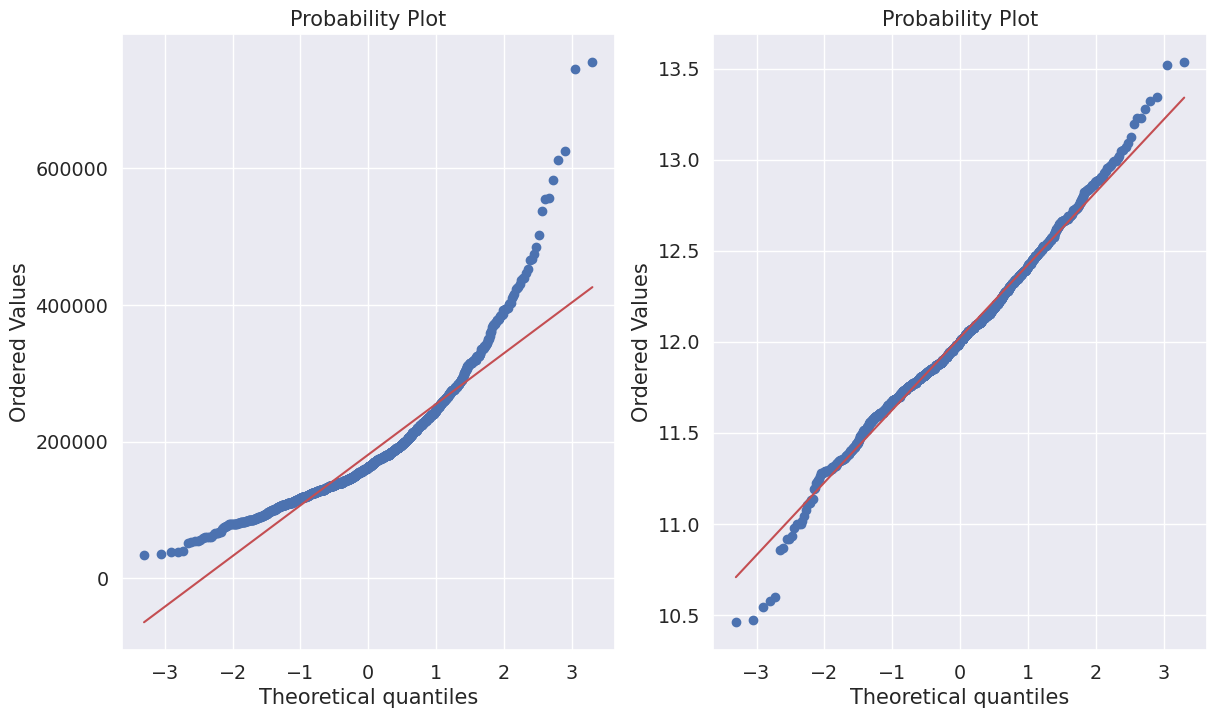

In [ ]:
# Применим логарифмическое преобразование

fig = plt.figure(figsize = (14,8))

# Распределение на необработанных данных
fig.add_subplot(1,2,1)
res = stats.probplot(df['SalePrice'], plot=plt)

# Распределение с логарифмическим преобразованием 'SalePrice'
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df['SalePrice']), plot=plt)

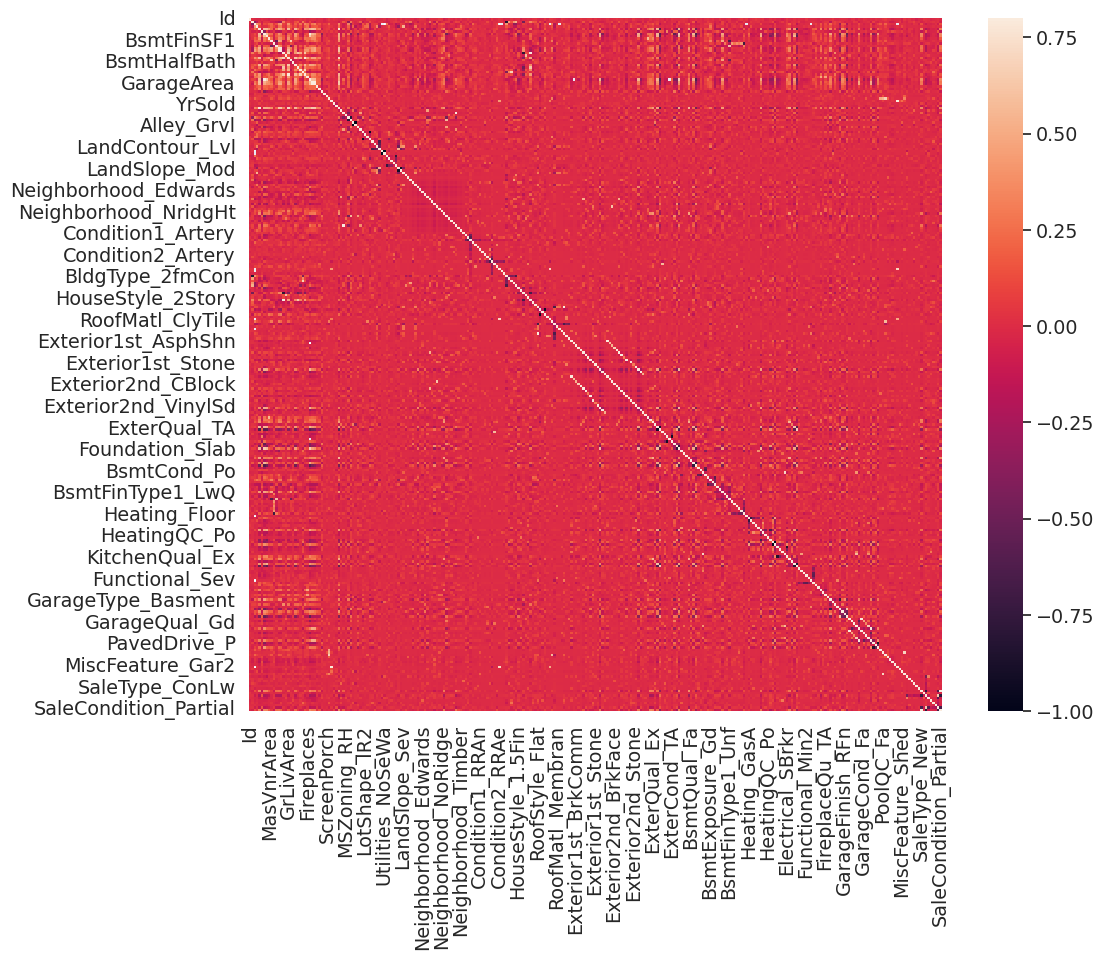

In [ ]:
#  Посмотрим, с какими признаками коррелирует целевая переменная SalePrice, но прежде чем выведем матрицу корреляции
#  предварительно закодируем категориальные признаки в числовые значения, методом One-Hot Encoding

df_encoded = pd.get_dummies(df)

# Вычисление матрицы корреляции

corrmat = df_encoded.corr()

# Визуализация матрицы корреляции с использованием seaborn

plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

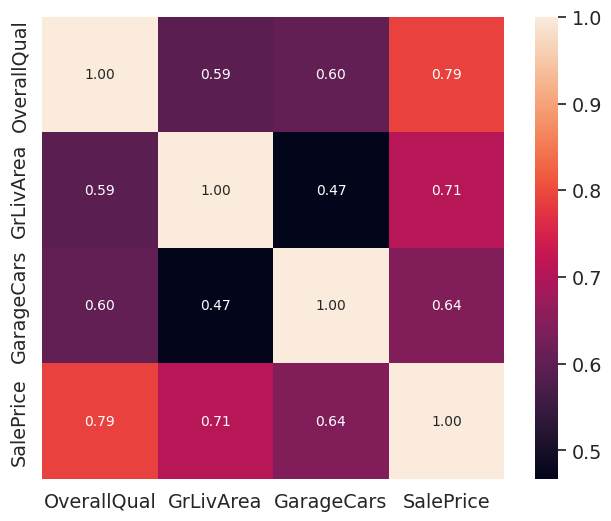

In [ ]:
# Выведем матрицу по интересующим нас признакам
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']

# Вычислим коэффициенты корреляции только для выбранных признаков
cm = np.corrcoef(df_encoded[features].values.T)

# Визуализация усеченной матрицы корреляции
sns.set(font_scale=1.25)
plt.figure(figsize=(8, 6))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=features, xticklabels=features)
plt.show()

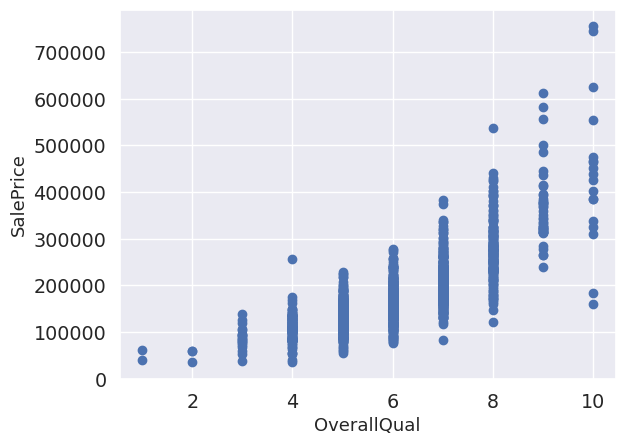

In [ ]:
# Проверим эти признаки на наличие выбросов:
fig, ax = plt.subplots()
ax.scatter(x = df['OverallQual'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

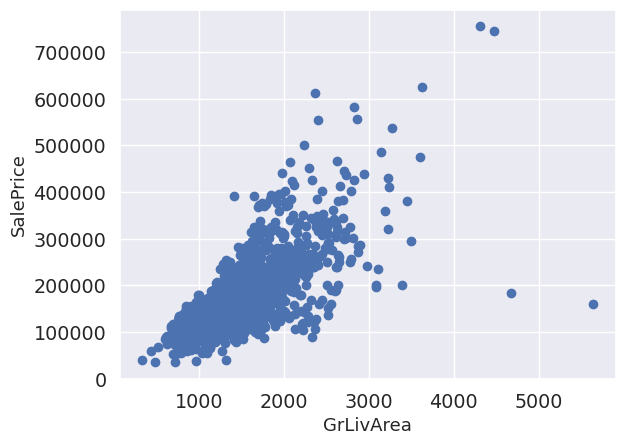

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

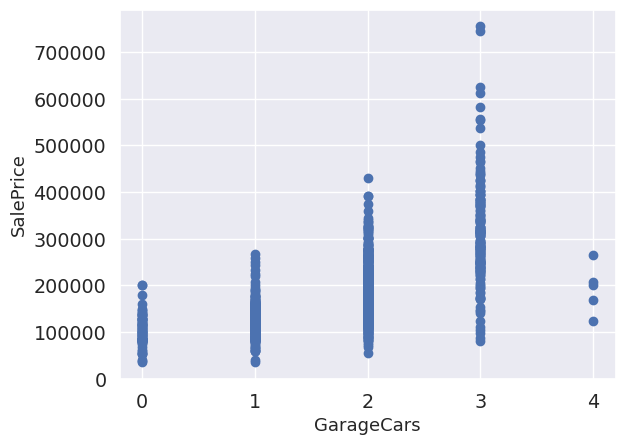

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['GarageCars'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

In [ ]:
# Выбросы незначительны, но удаление выделяющихся значений, может улучшить результат

df = df.drop(df[(df['OverallQual'] > 9) & (df['SalePrice'] < 350000)].index)
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 500000)].index)
df = df.drop(df[(df['GarageCars'] > 3100) & (df['SalePrice'] < 500000)].index)

In [ ]:
# Применение кодирования One-Hot:

# Проверим уникальные значения в столбце 'Utilities'
unique_utilities = df['Utilities'].unique()

# Вывод уникальных значений
print(unique_utilities)

['AllPub' 'NoSeWa']


In [ ]:
# Применение кодирования One-Hot
encoded_utilities = pd.get_dummies(df['Utilities'], prefix='Utility')

# Объединение закодированных столбцов с исходным DataFrame
final_df = pd.concat([df, encoded_utilities], axis=1)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea MiscVal MoSold  \
0            Lvl    AllPub    Inside  ... 

In [ ]:
# Выбор исходного столбца 'Utilities' и закодированных столбцов
selected_columns = pd.concat([df['Utilities'], encoded_utilities], axis=1)

# Вывод выбранных столбцов
print(selected_columns)

     Utilities  Utility_AllPub  Utility_NoSeWa
0       AllPub            True           False
1       AllPub            True           False
2       AllPub            True           False
3       AllPub            True           False
4       AllPub            True           False
...        ...             ...             ...
1455    AllPub            True           False
1456    AllPub            True           False
1457    AllPub            True           False
1458    AllPub            True           False
1459    AllPub            True           False

[1455 rows x 3 columns]


In [ ]:
# Сохраняем очищенные и преобразованные данные в новый CSV-файл под названием 'cleaned_house_prices.csv'

final_df.to_csv('cleaned_house_prices.csv', index=False)

# Вывод сообщения об успешном сохранении
print('Данные успешно сохранены в файл "cleaned_house_prices.csv"')

Данные успешно сохранены в файл "cleaned_house_prices.csv"
